In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# > 数据集：https://www.kaggle.com/spscientist/students-performance-in-exams
data = pd.read_csv('StudentsPerformance.csv')

In [13]:
# understanding data

In [47]:
data.head().append(data.tail())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
data.shape

(1000, 8)

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [35]:
data['math score'].value_counts()

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64

In [14]:
# cleaning data

In [15]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
student = data.drop(columns=['race/ethnicity', 'parental level of education'])
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [17]:
# relationship analysis

In [18]:
corelation = student.corr()

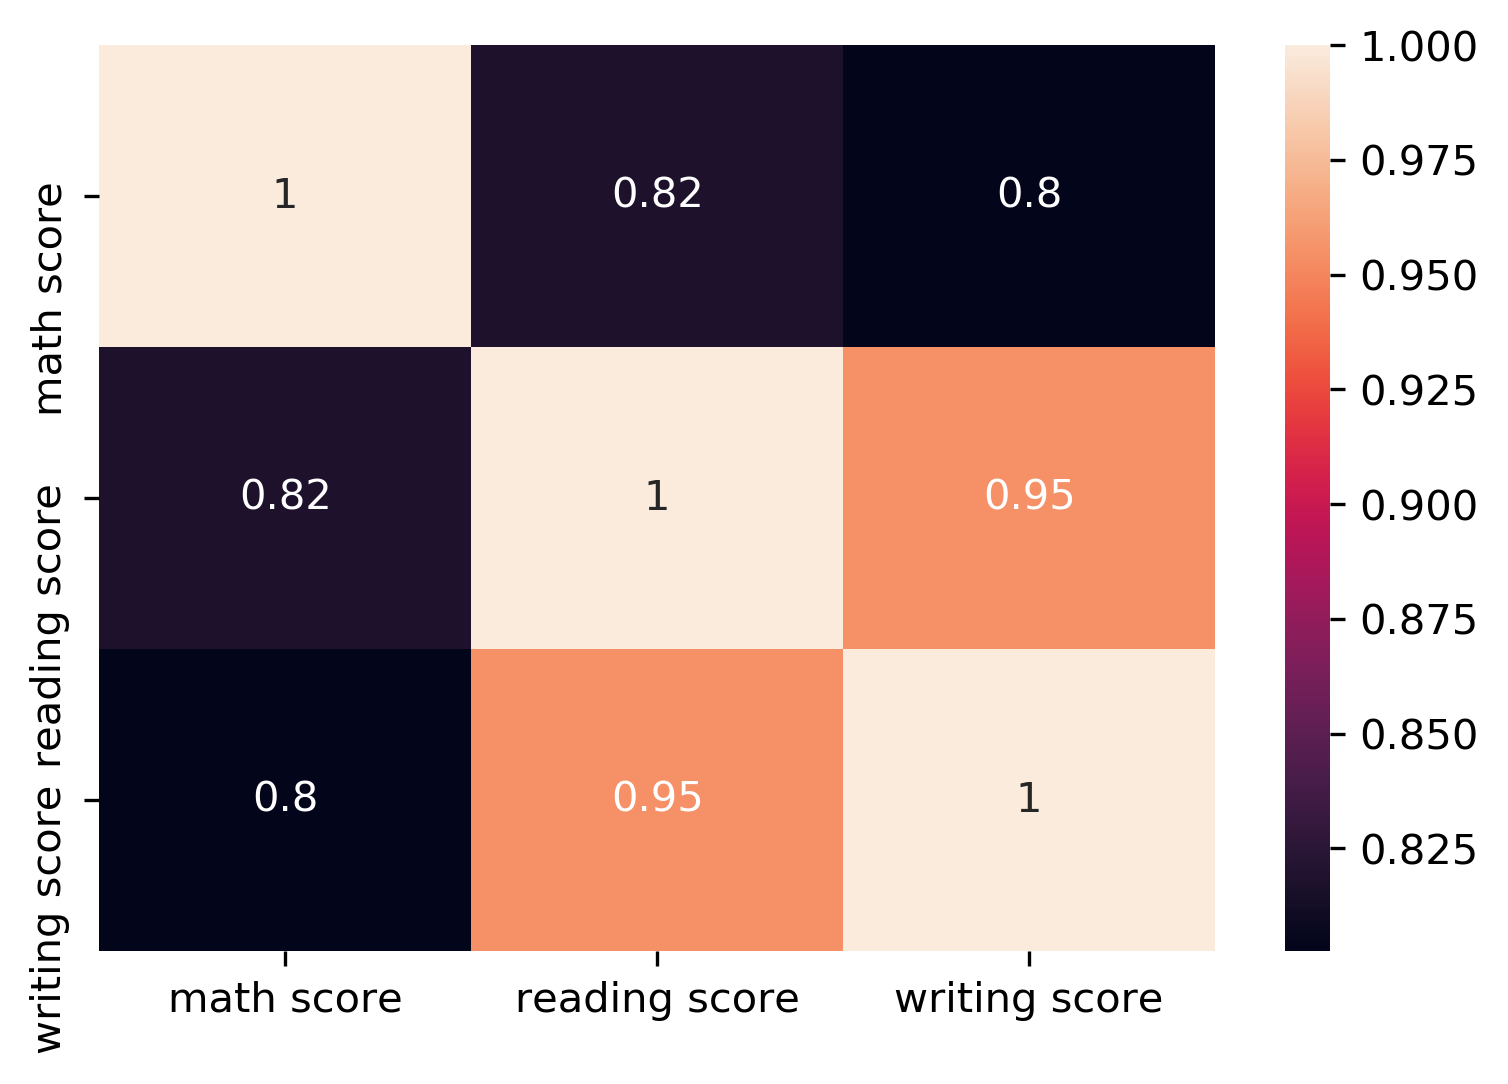

In [21]:
plt.rcParams['figure.dpi'] = 300
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,
           annot=True)

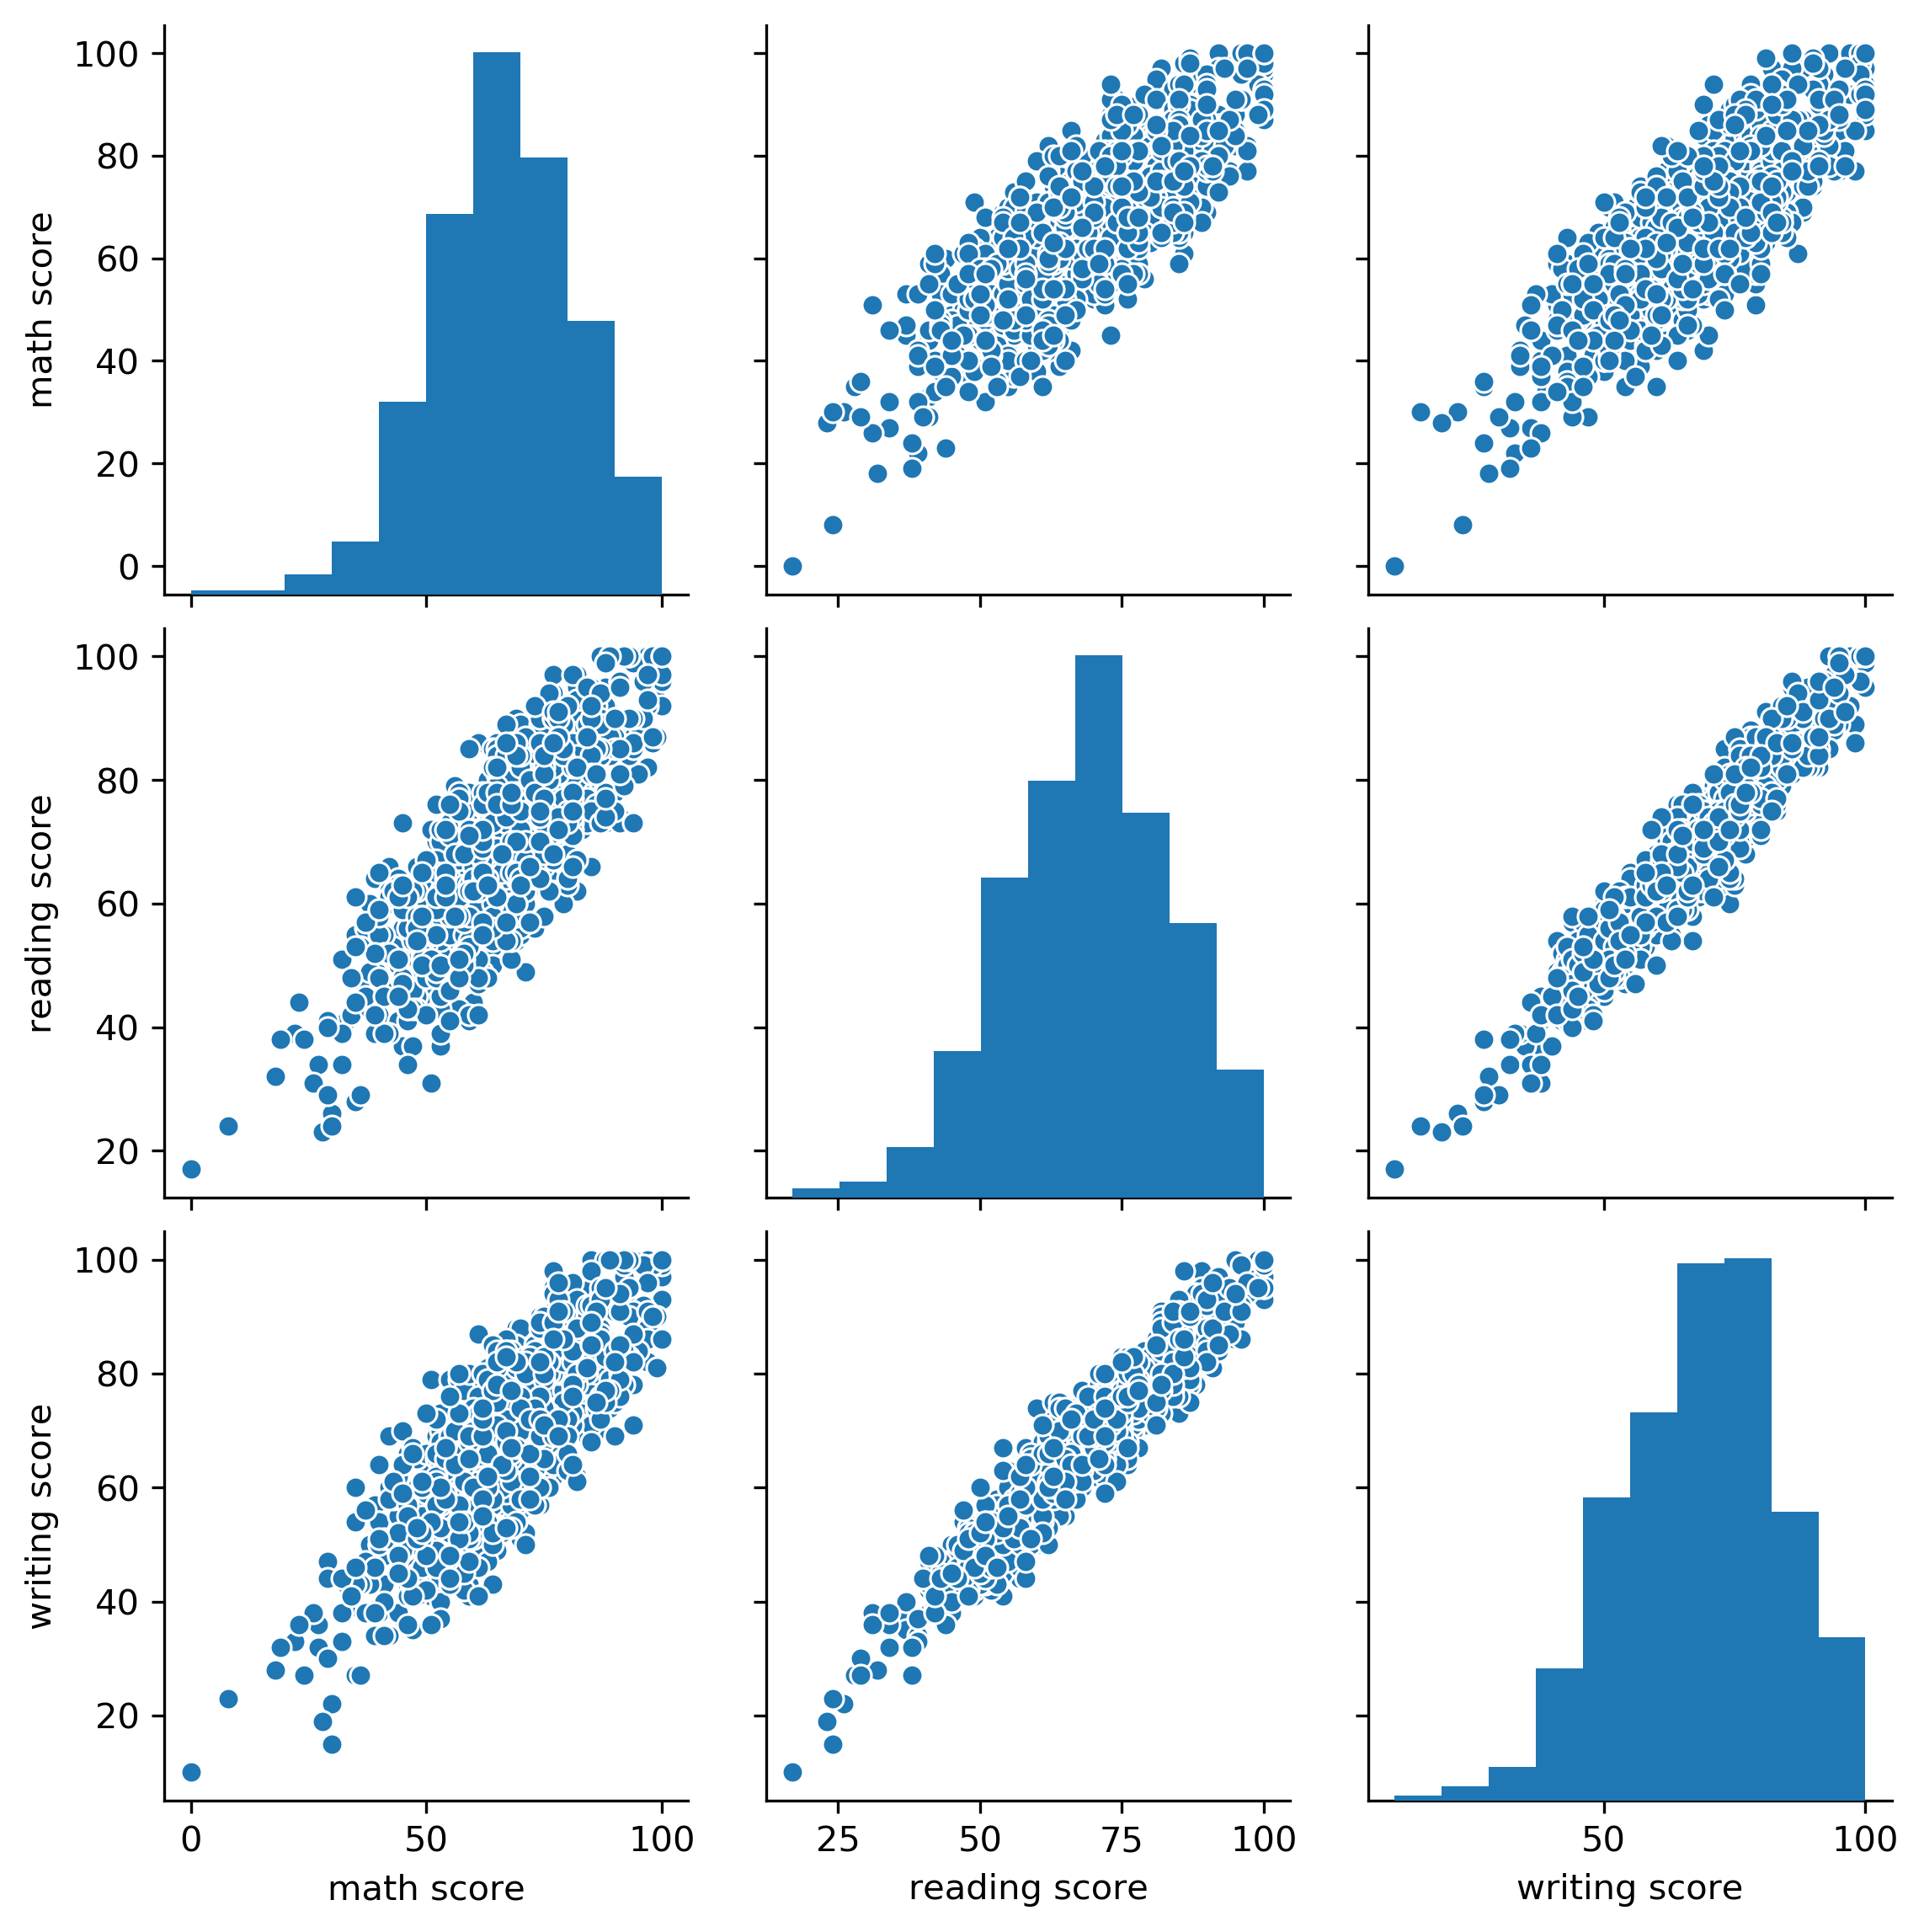

In [22]:
sns.pairplot(student)

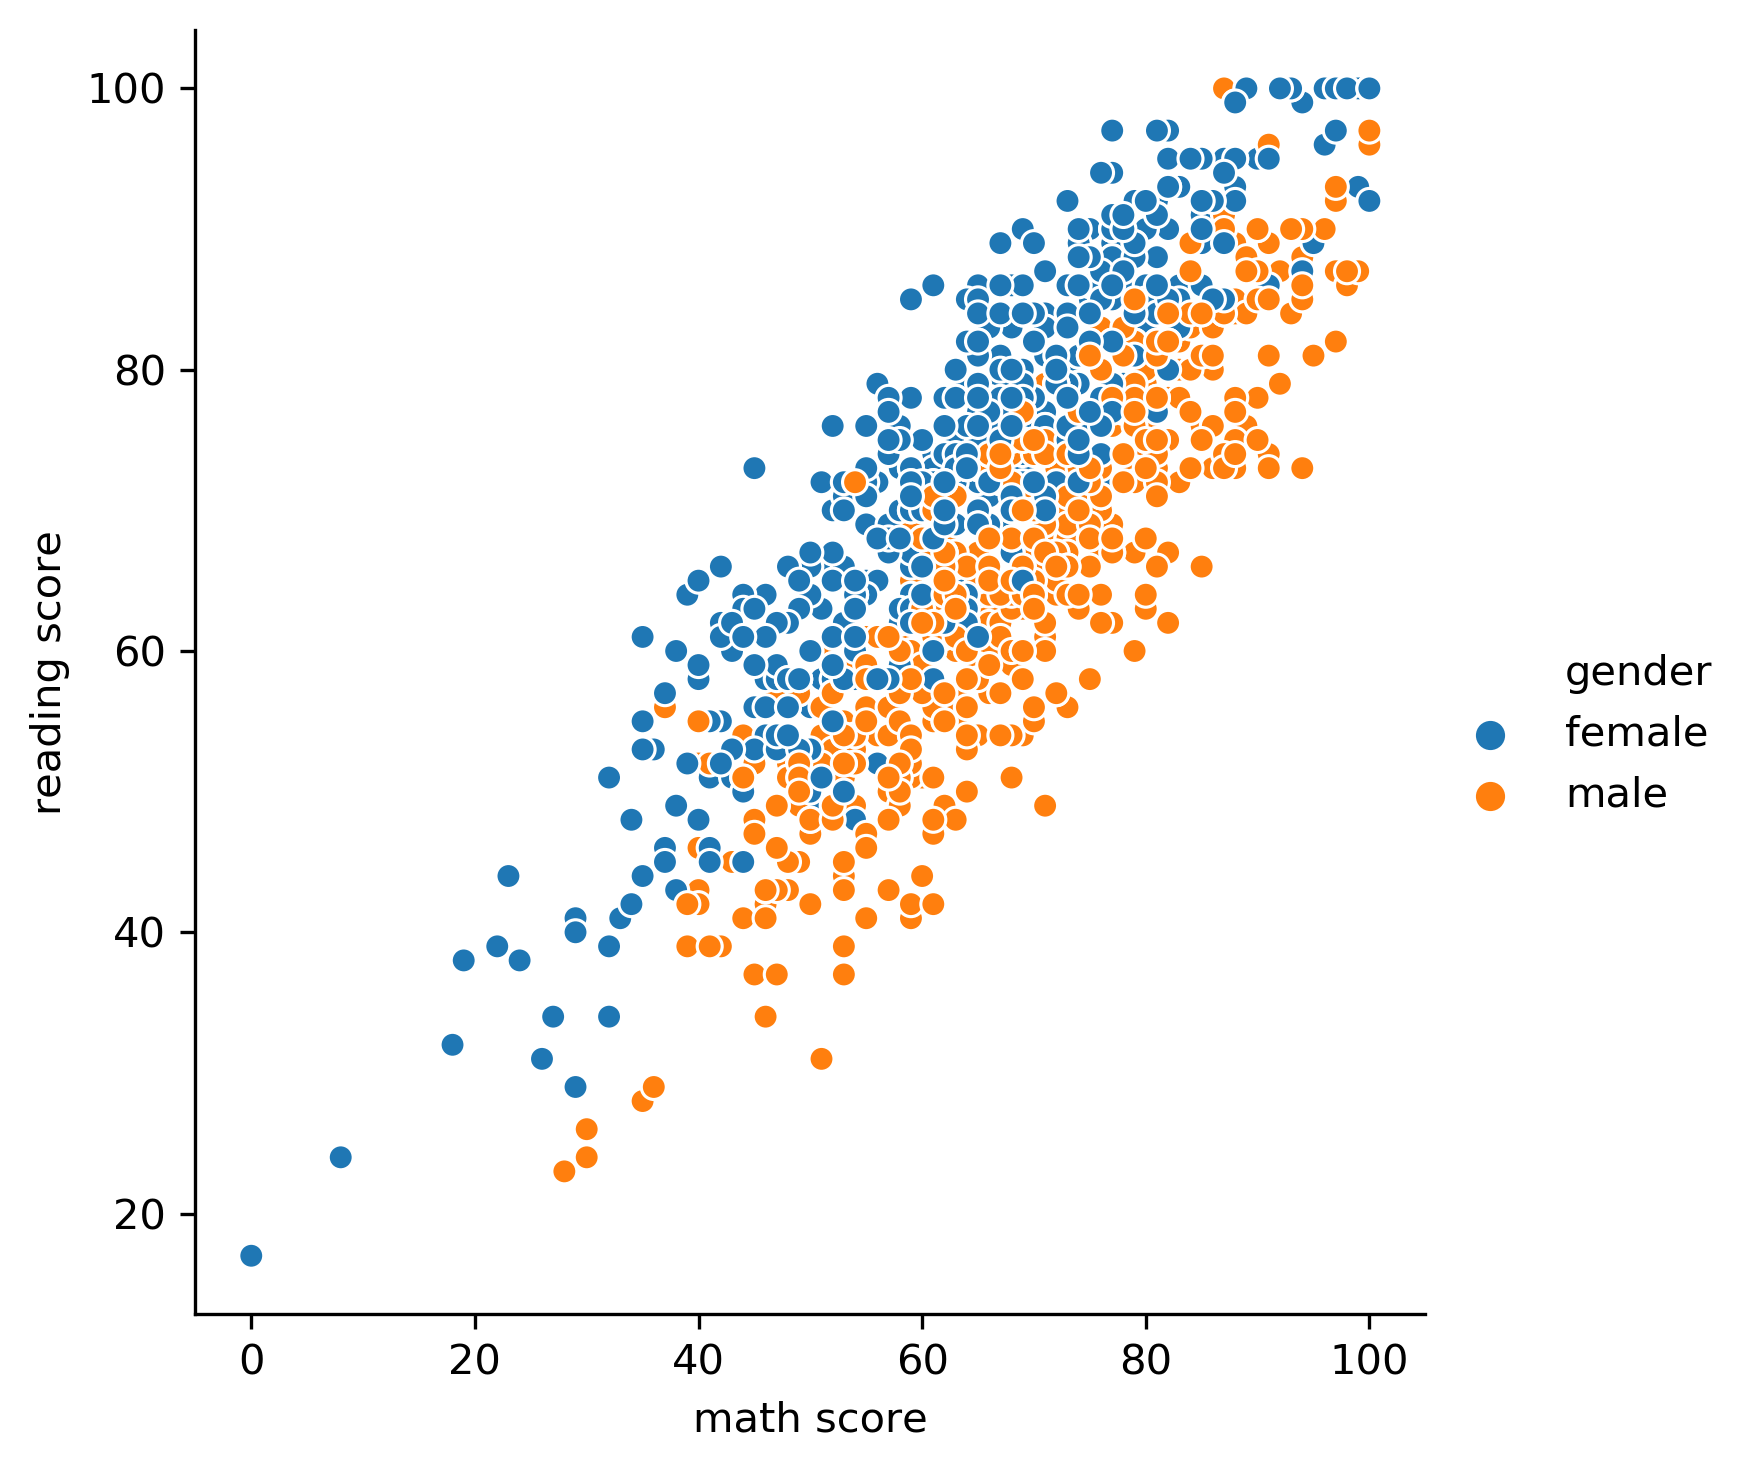

In [23]:
sns.relplot(x='math score', y='reading score', hue='gender', data=student)

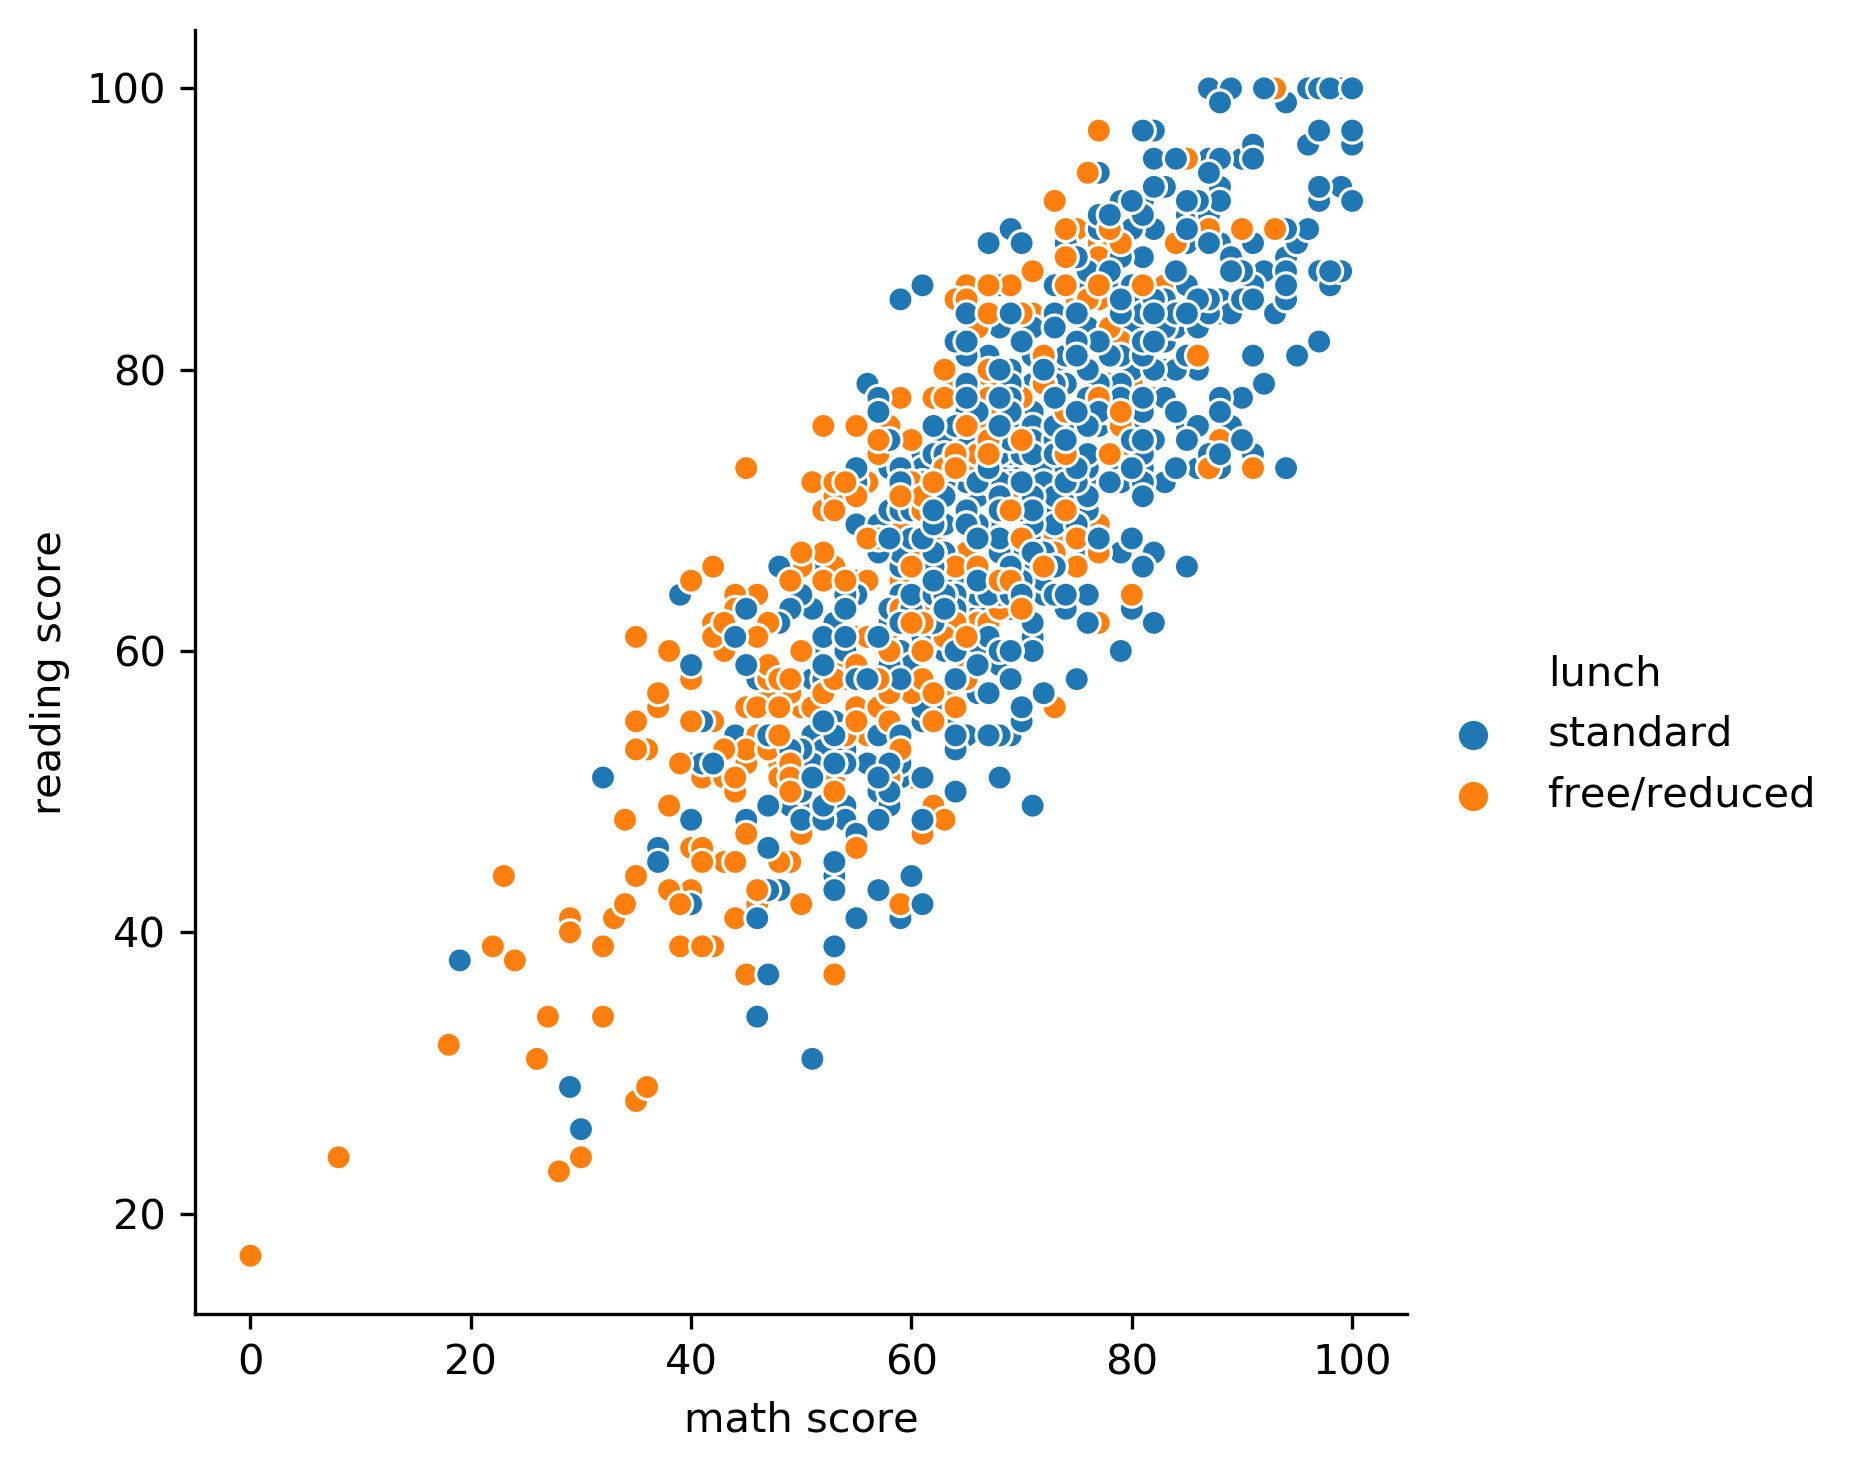

In [24]:
sns.relplot(x='math score', y='reading score', hue='lunch', data=student)

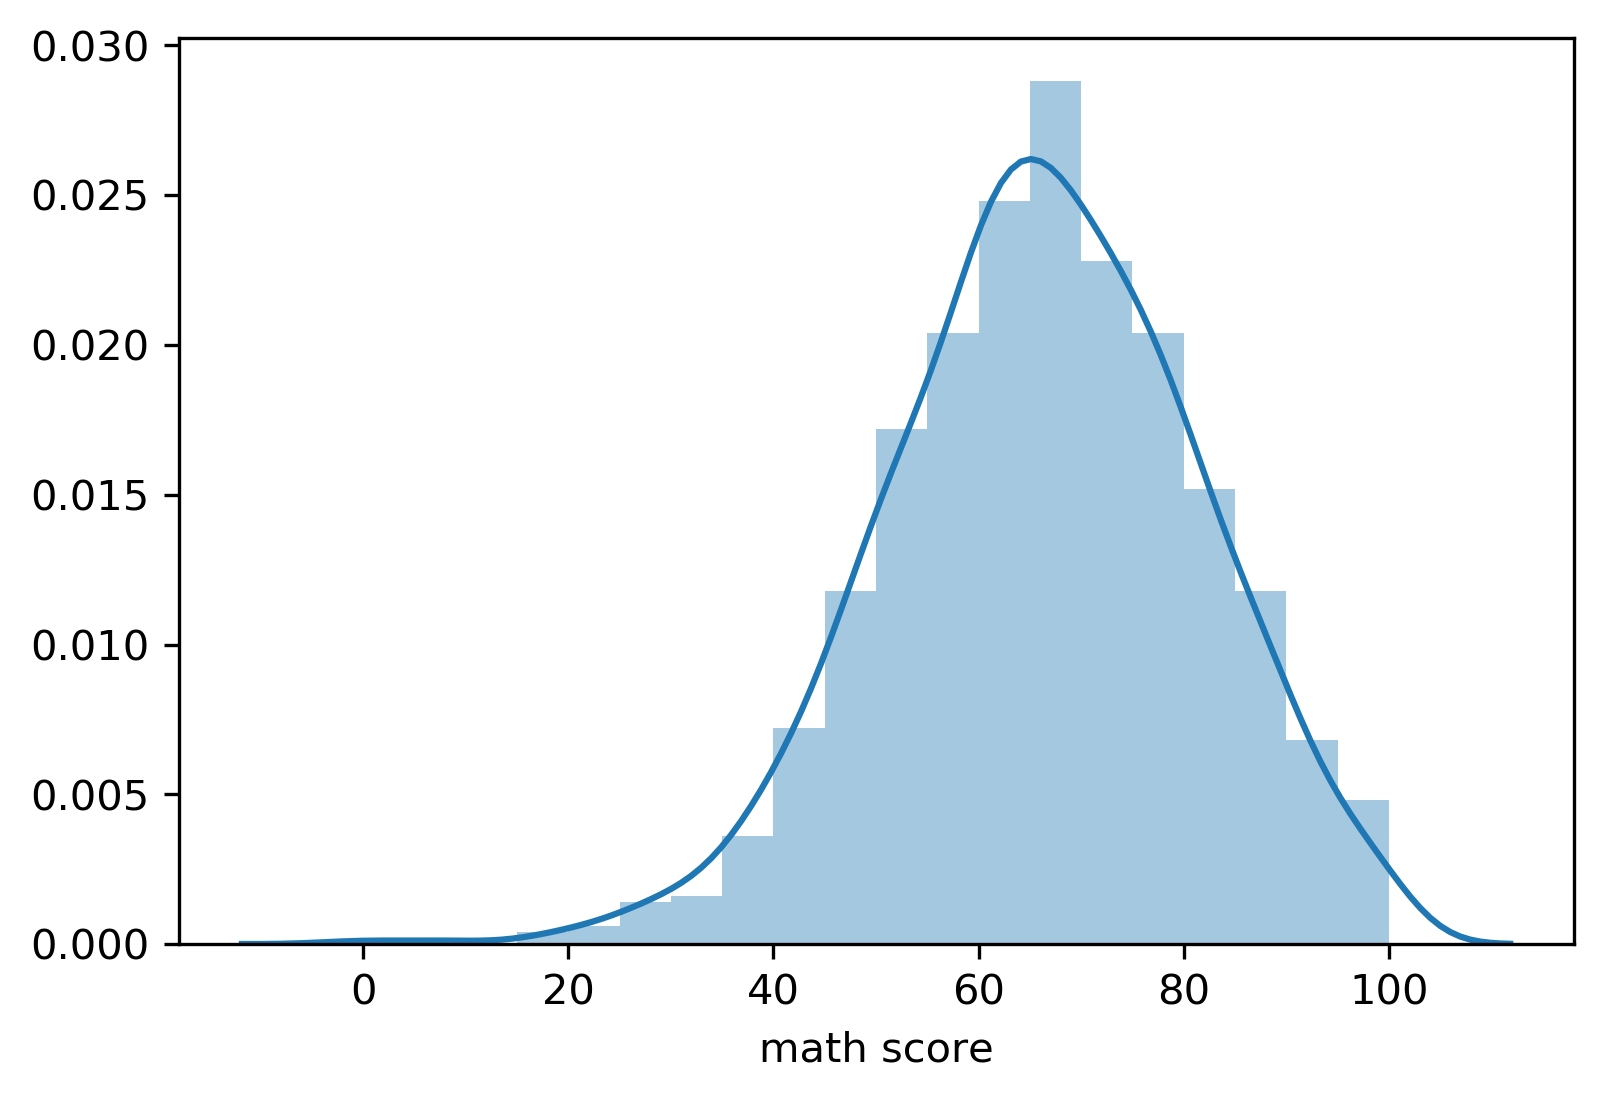

In [29]:
sns.distplot(student['math score'],bins=20)

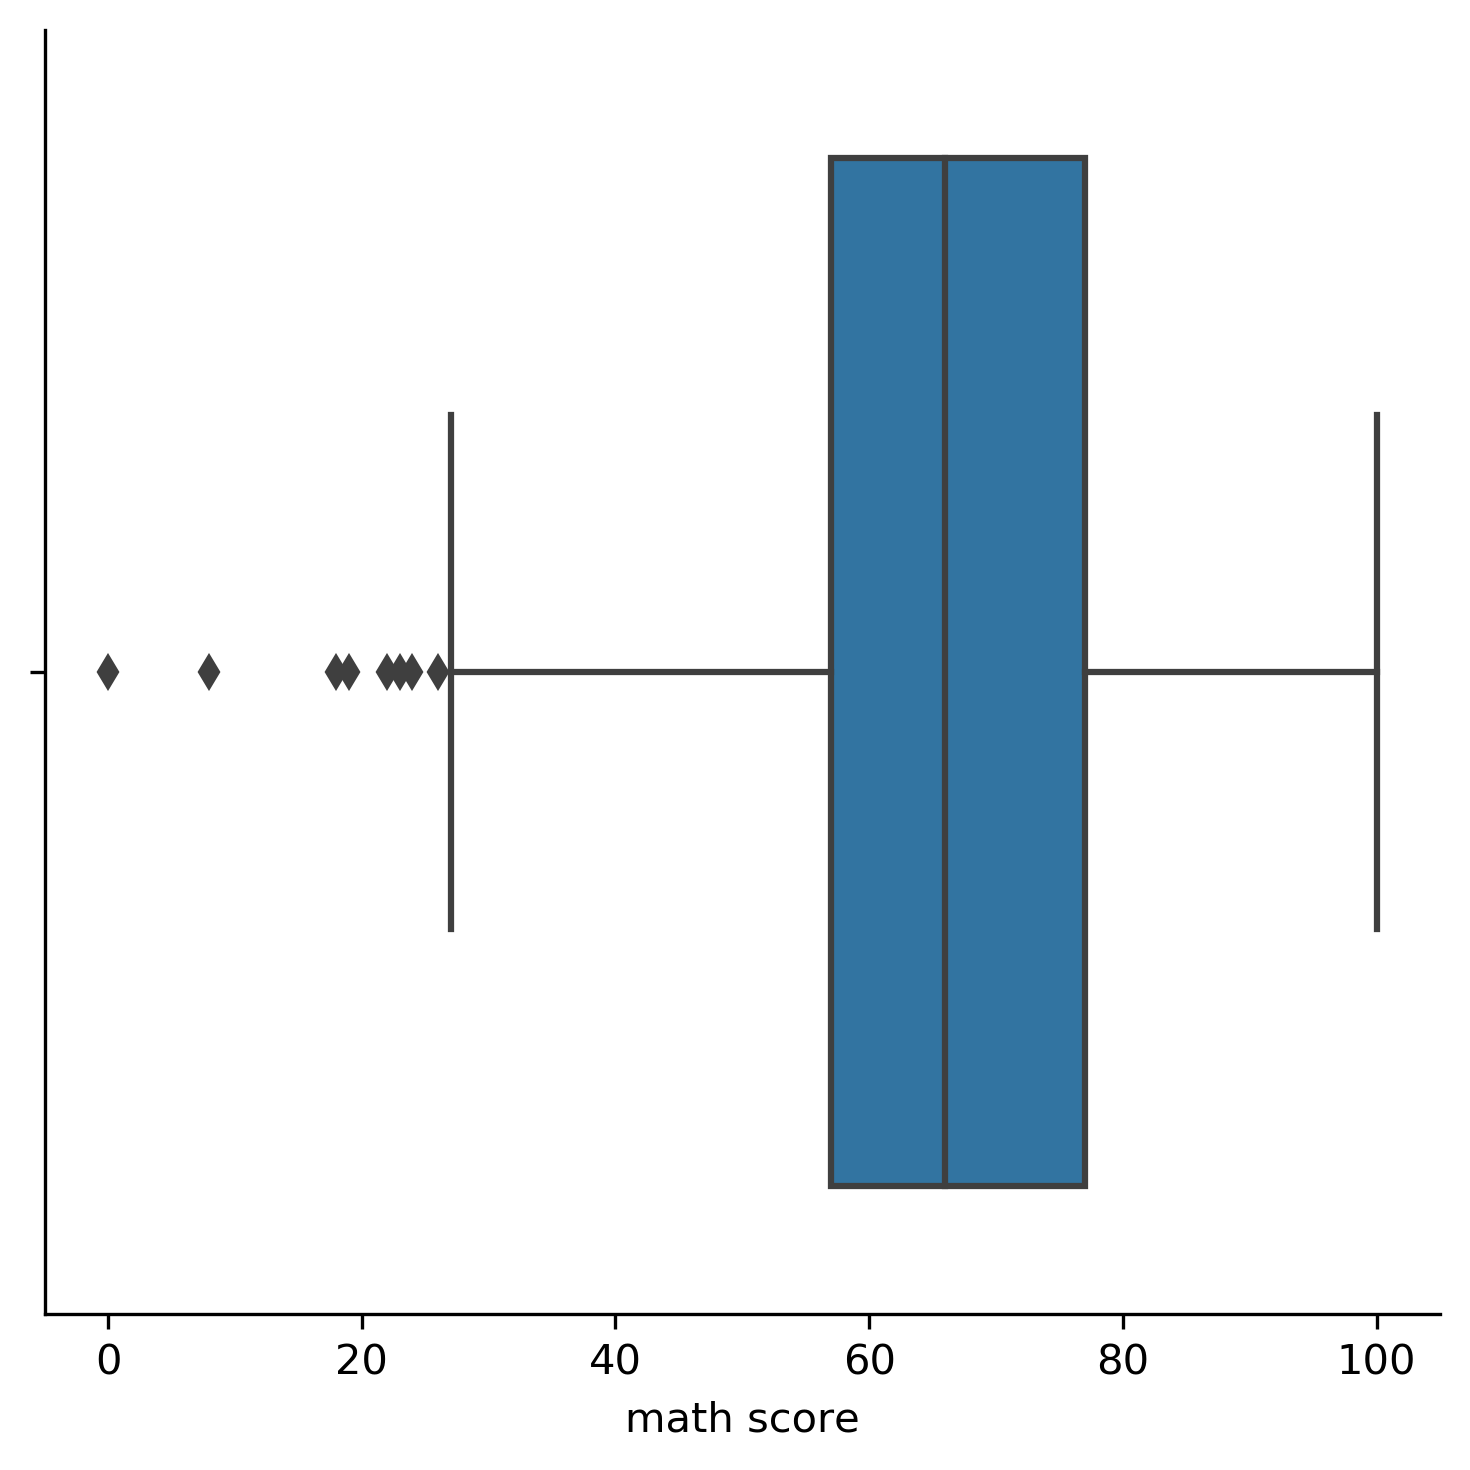

In [31]:
sns.catplot(x='math score', kind='box', data=student)

In [42]:
data.columns[-3:]

Index(['math score', 'reading score', 'writing score'], dtype='object')

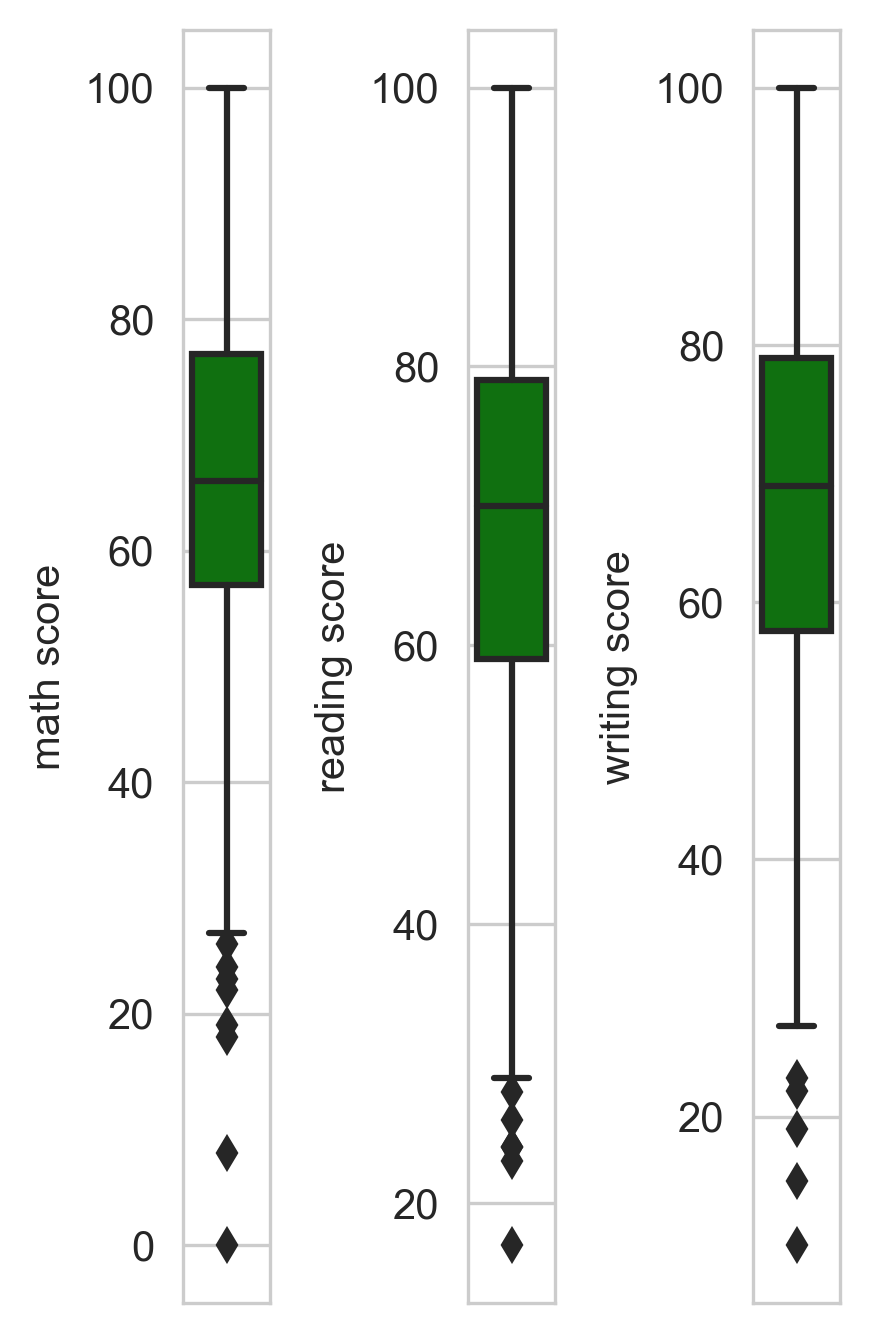

In [43]:
n_features = data.columns[-3:].values
n_columns = len(data.columns[-3:])
n_rows = len(n_features)-1/n_columns

plt.figure(figsize=(n_columns, 5 * n_rows))

for i in range(0,len(n_features)):
    plt.subplot(n_rows + 1, n_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[n_features[i]], color='green', orient='v')
    plt.tight_layout()

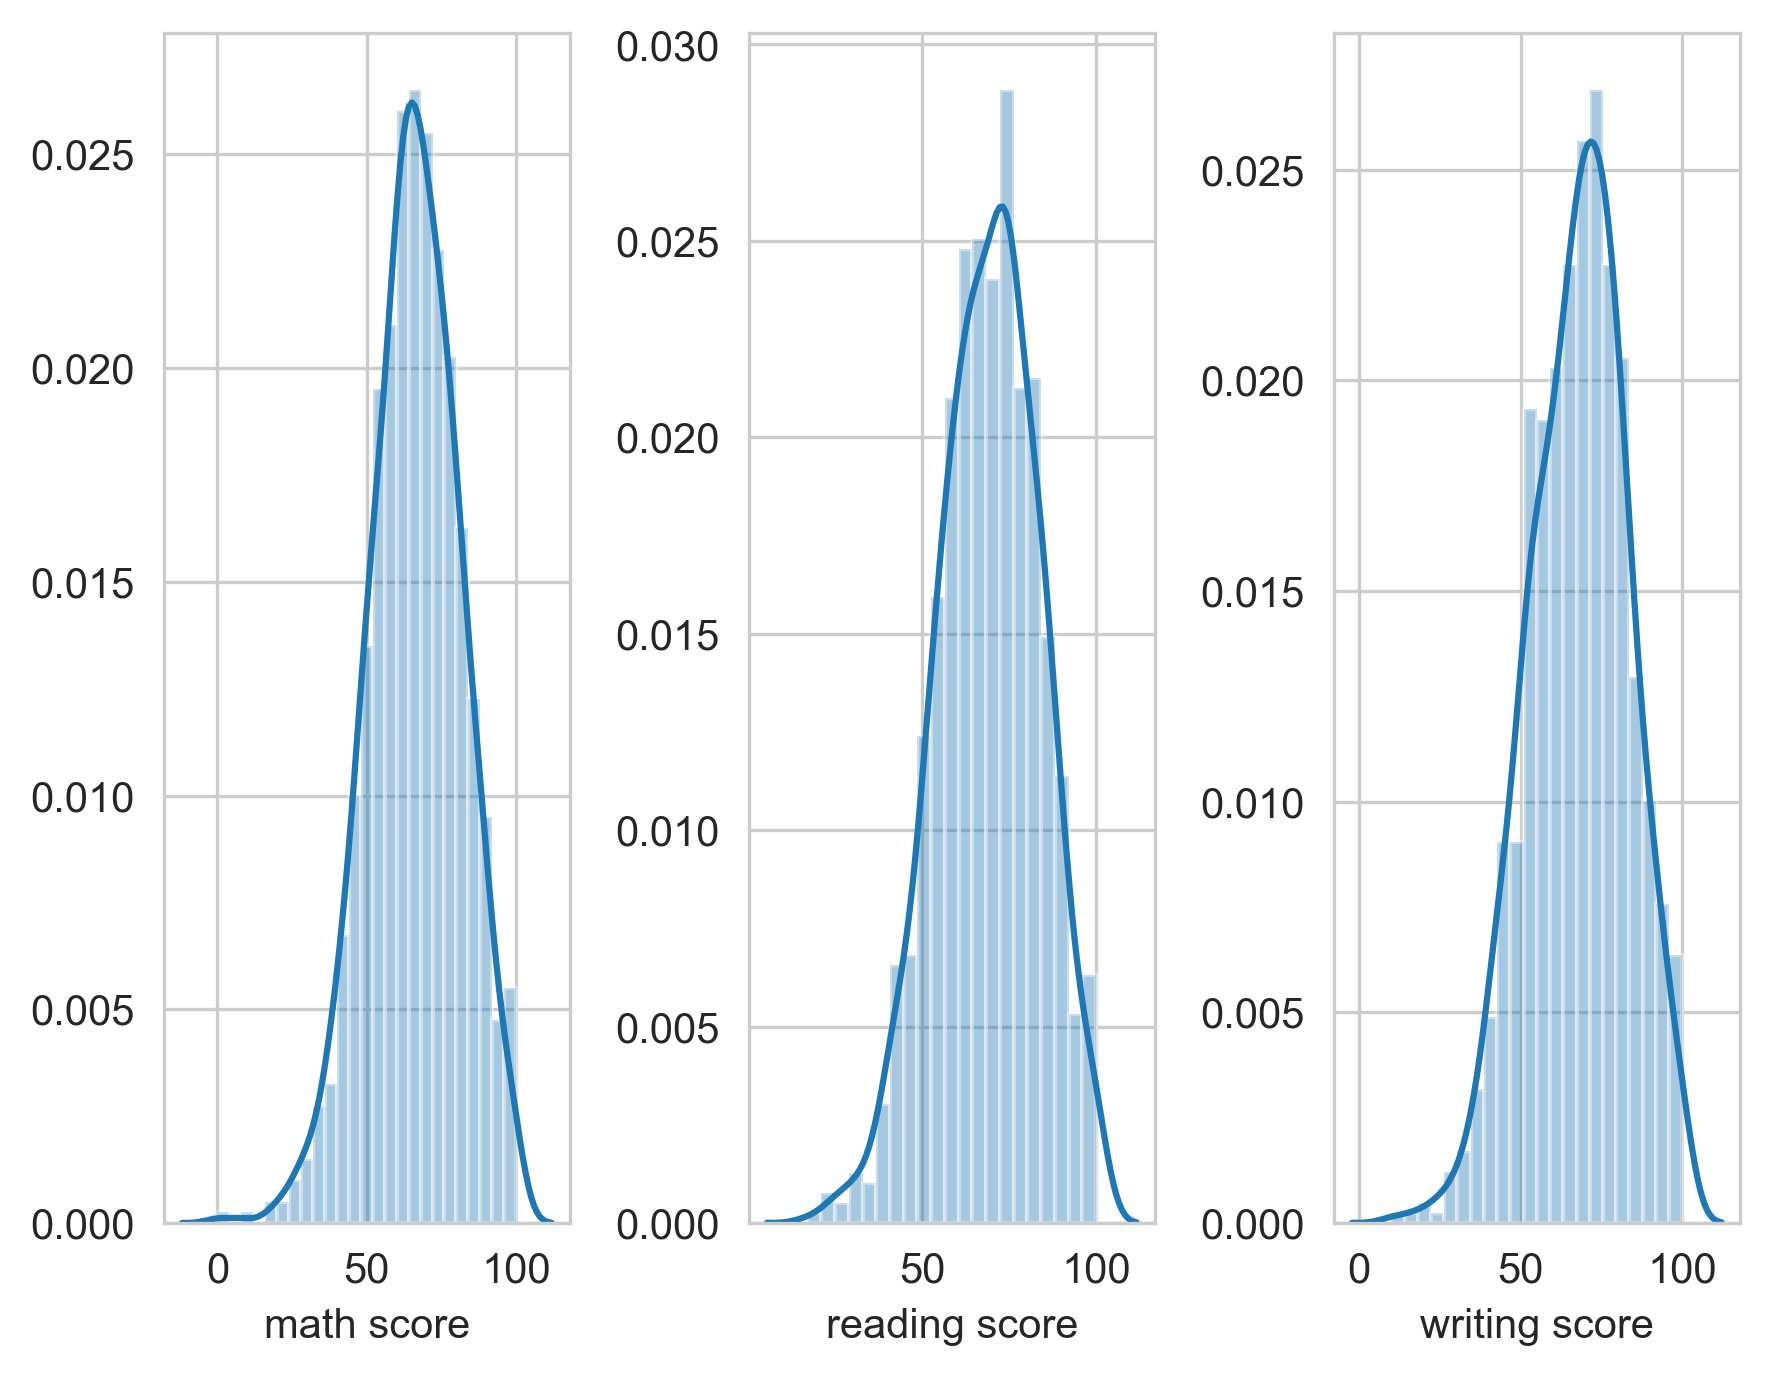

In [46]:
plt.figure(figsize=(2 * n_columns, 5 * n_rows))
for i in range(0,len(n_features)):
    plt.subplot(n_rows + 1, n_columns, i+1)
    sns.distplot(data[n_features[i]], kde=True)
plt.tight_layout()

In [49]:
data['math score'].isnull().sum()

0

In [54]:
data['math score'].isna().sum()

0

In [57]:
np.isinf(data['math score']).sum()

0

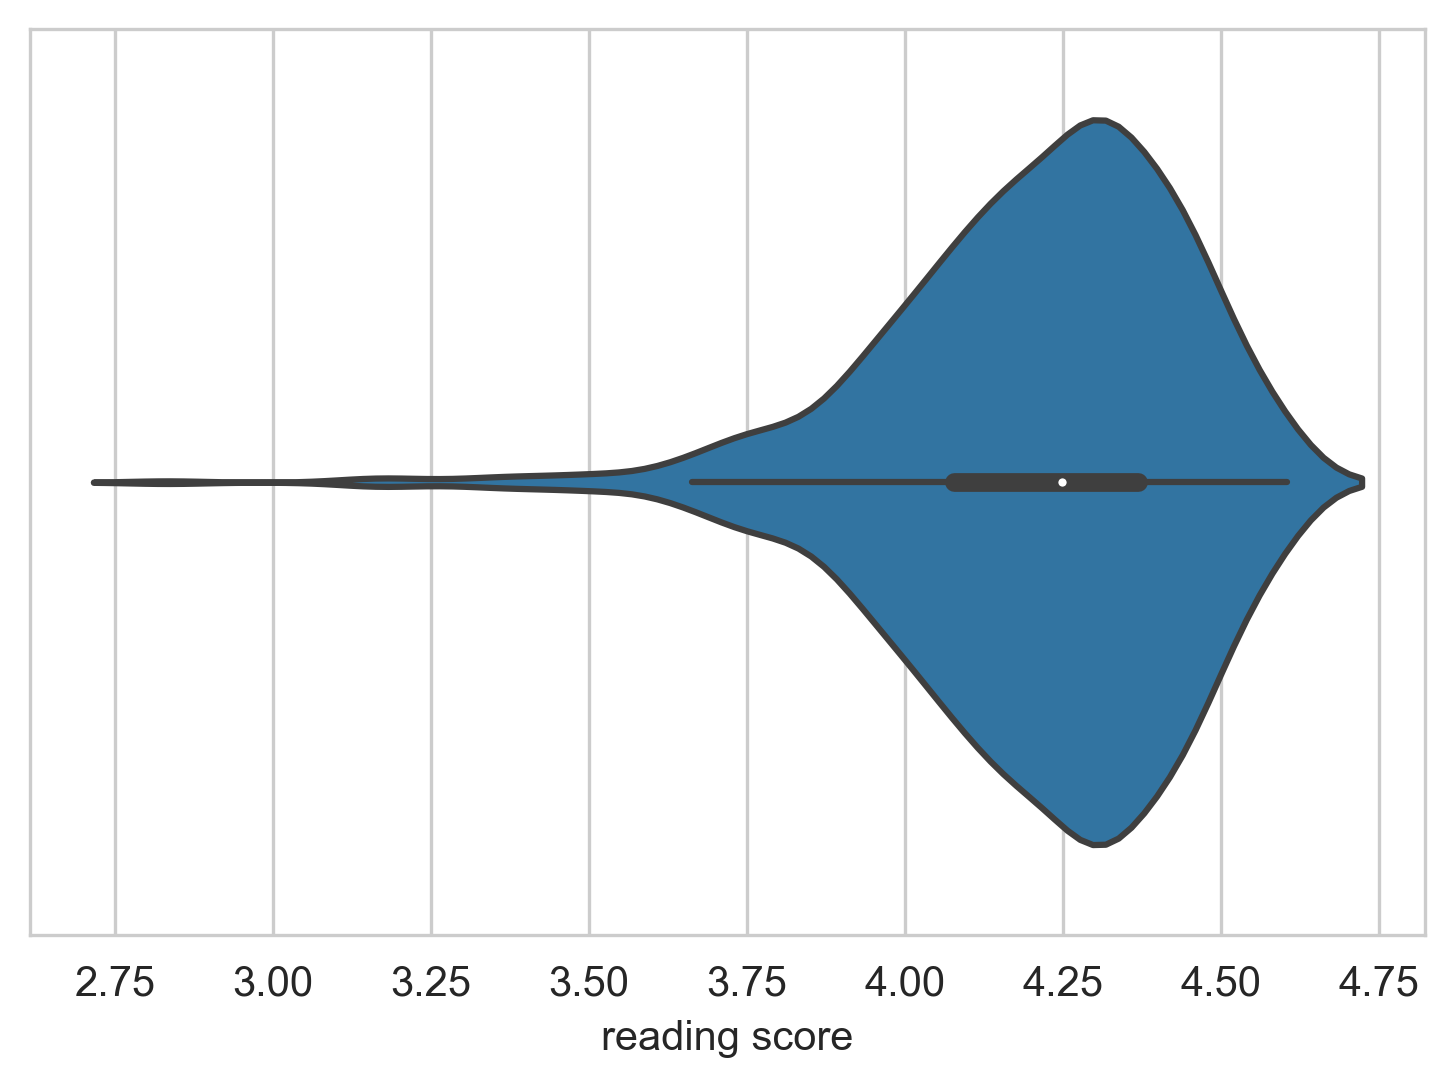

In [59]:
# 通过小提琴图图查看异常值，以reading score为例
sns.violinplot(np.log(data['reading score']))

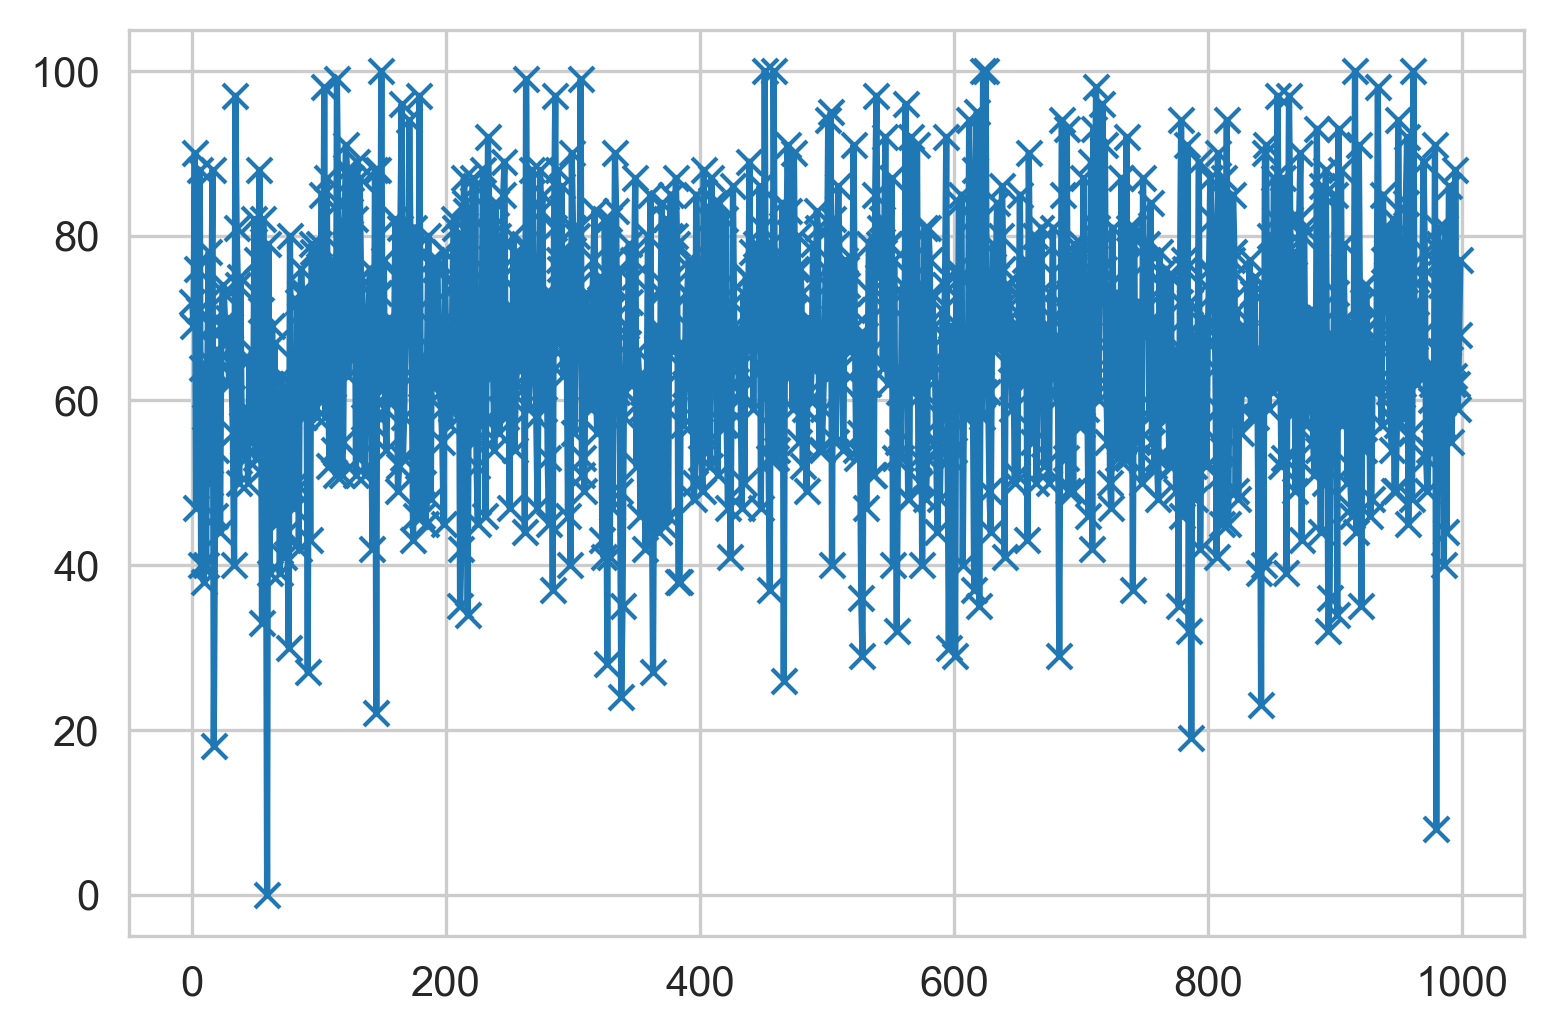

In [66]:
data['math score'].plot(marker='x')

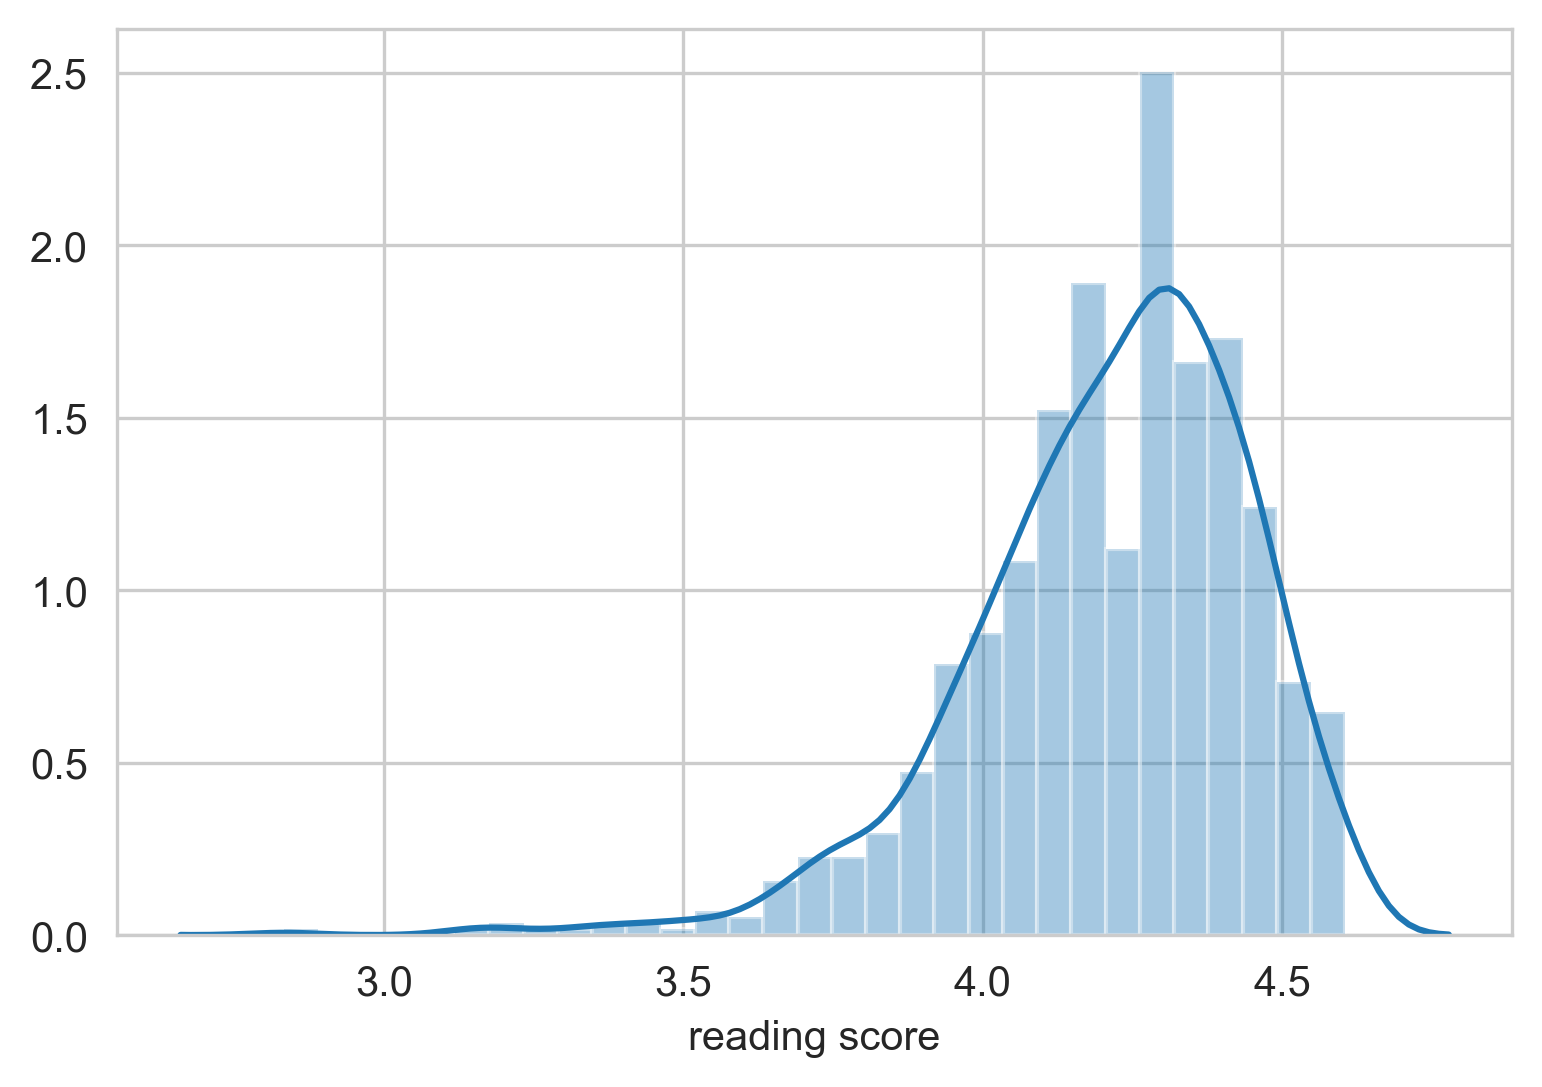

In [68]:
# 目标变量要尽量符合高斯分布。
# 有很多算法的前提假设是数据符合正态分布，例如线性回归里面最小二乘法的一个前提假设就是数据符合正态分布。
# 如果不符合可以通过np.log函数转换
sns.distplot(np.log(data['reading score']))

In [104]:
x1 = [10.00, 8.00,13.00,9.00,11.00,14.00,6.00,4.00,12.00,7.00,5.00]
y1 = [8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]
data1 = {'x1':x1, 'y1':y1}
data1 = pd.DataFrame(data1)
data1

,x1,y1
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [76]:
data1.describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [81]:
data1.corr()

,x1,y1
x1,1.000000,0.816421
y1,0.816421,1.000000


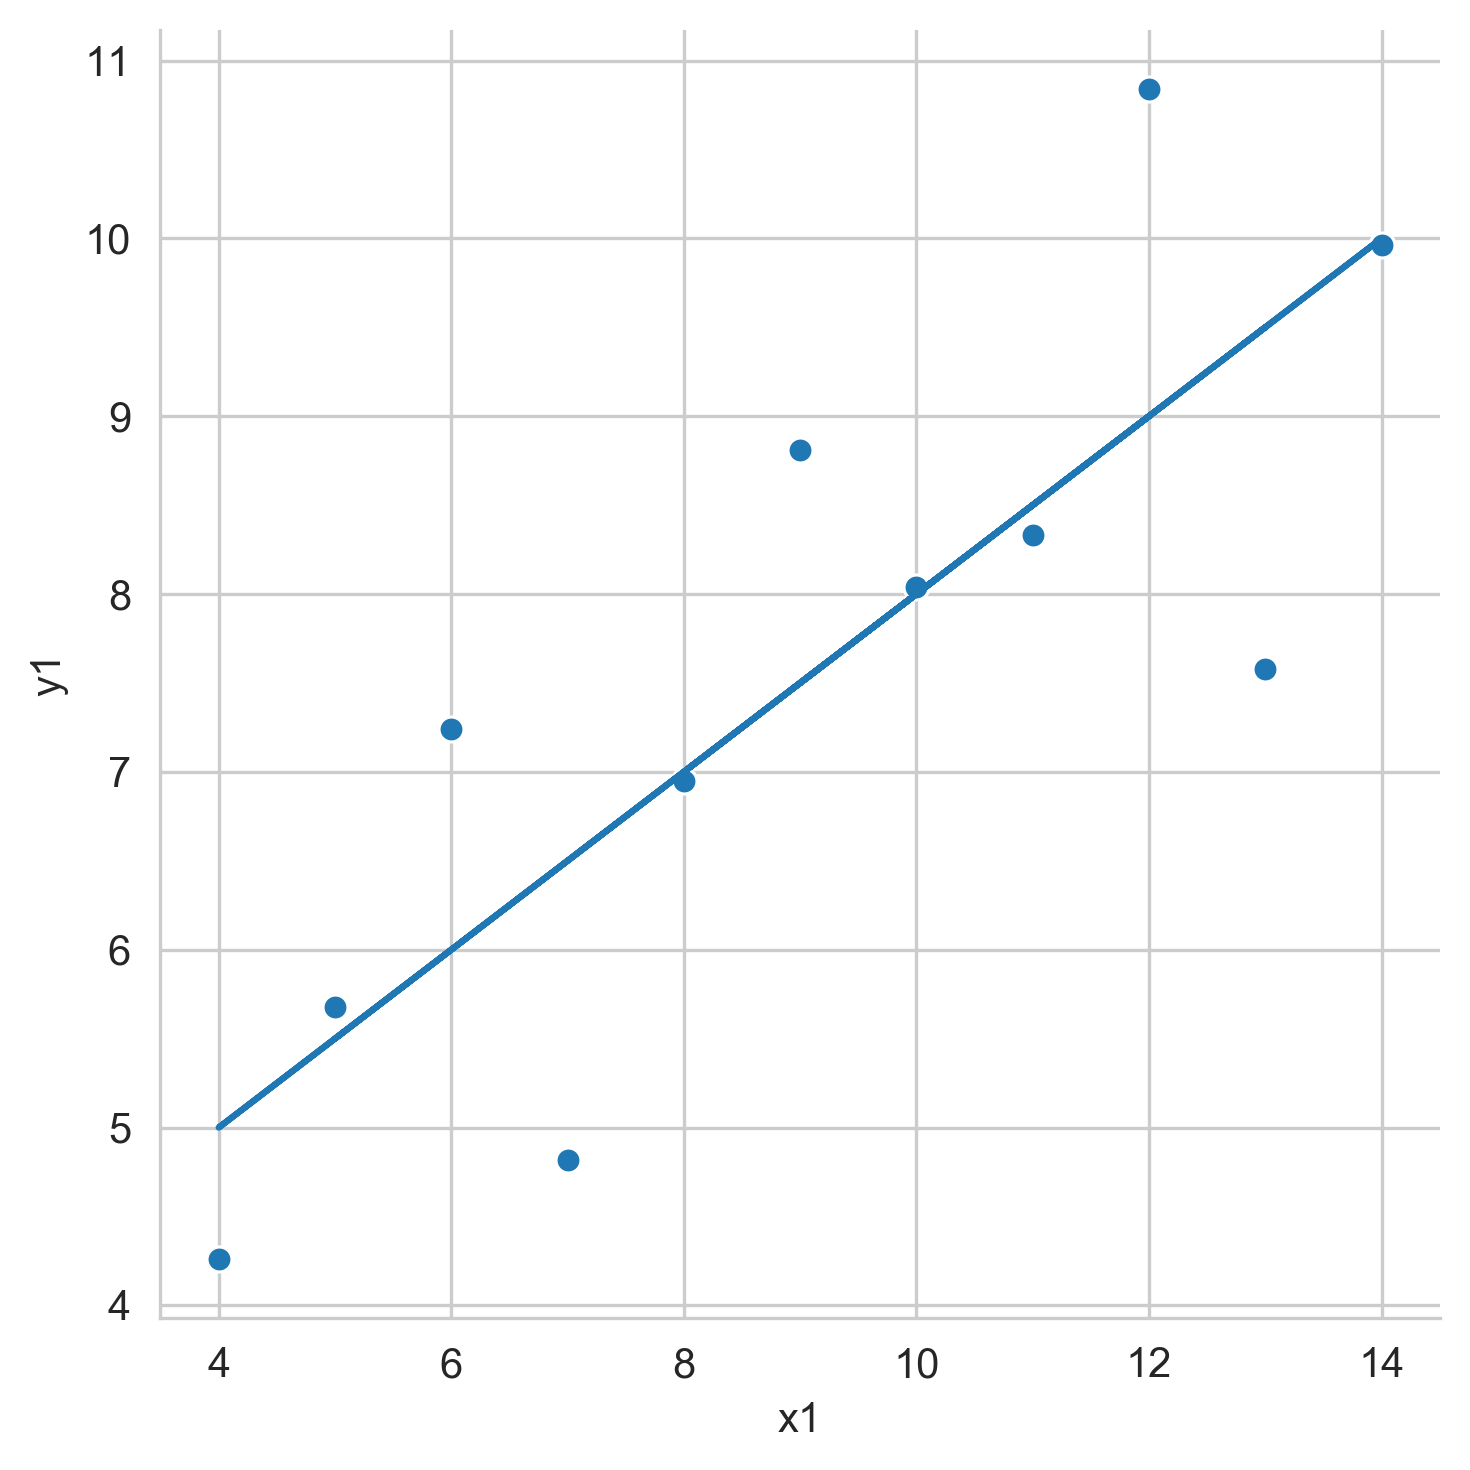

In [80]:
sns.relplot(x='x1', y='y1', data=data1)
plt.plot(data1.x1, 0.5*data1.x1+3)

In [84]:
x2 = [10.00,8.00,13.00,9.00,11.00,14.00,6.00,4.00,12.00,7.00,5.00]
y2 = [9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.10,9.13,7.26,4.74]

x3 = [10.00,8.00,13.00,9.00,11.00,14.00,6.00,4.00,12.00,7.00,5.00]
y3 = [ 7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73]

x4 = [8.00,8.00,8.00,8.00,8.00,8.00,8.00,19.00,8.00,8.00,8.00,]
y4 = [6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89,]

In [85]:
data2 = {'x2':x2, 'y2':y2}
data2 = pd.DataFrame(data2)

data3 = {'x3':x3, 'y3':y3}
data3 = pd.DataFrame(data3)

data4 = {'x4':x4, 'y4':y4}
data4 = pd.DataFrame(data4)

<Figure size 1200x1200 with 0 Axes>

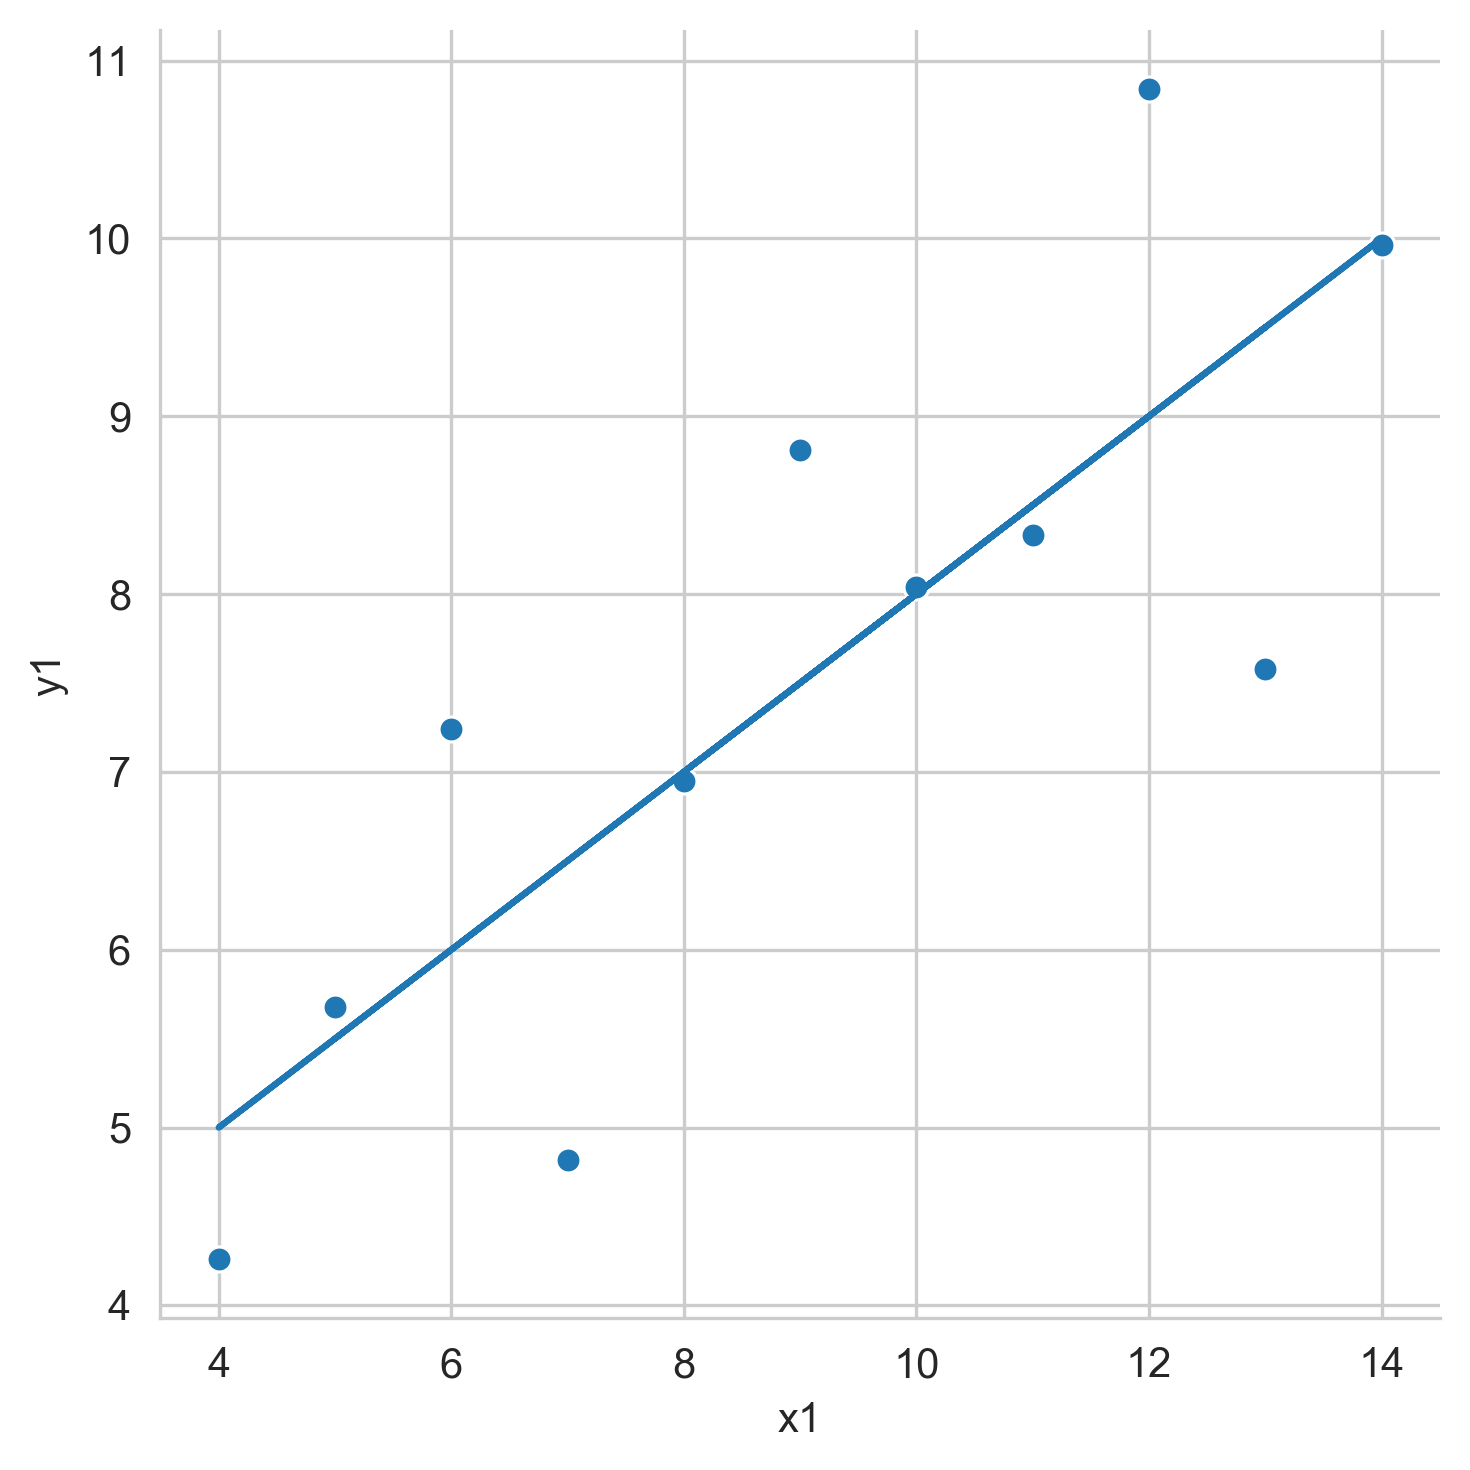

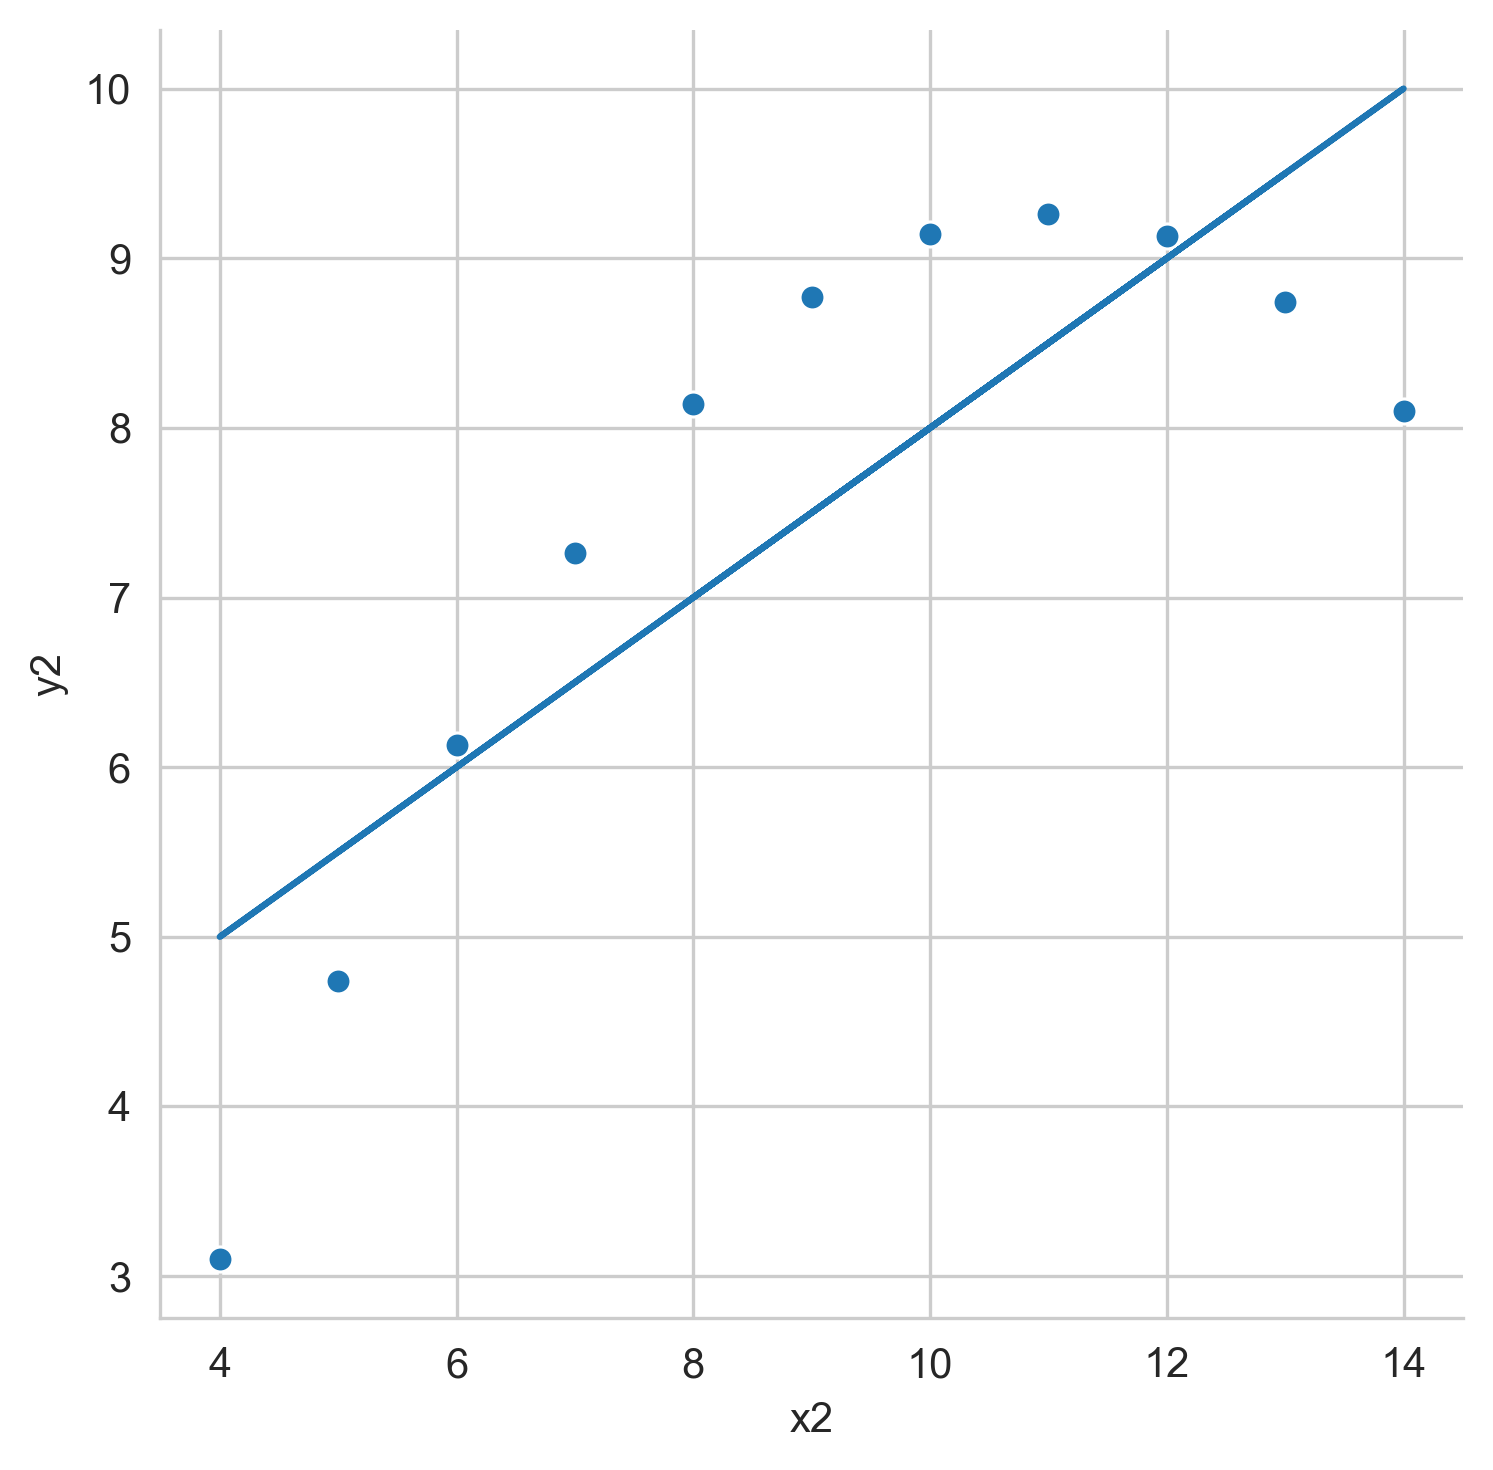

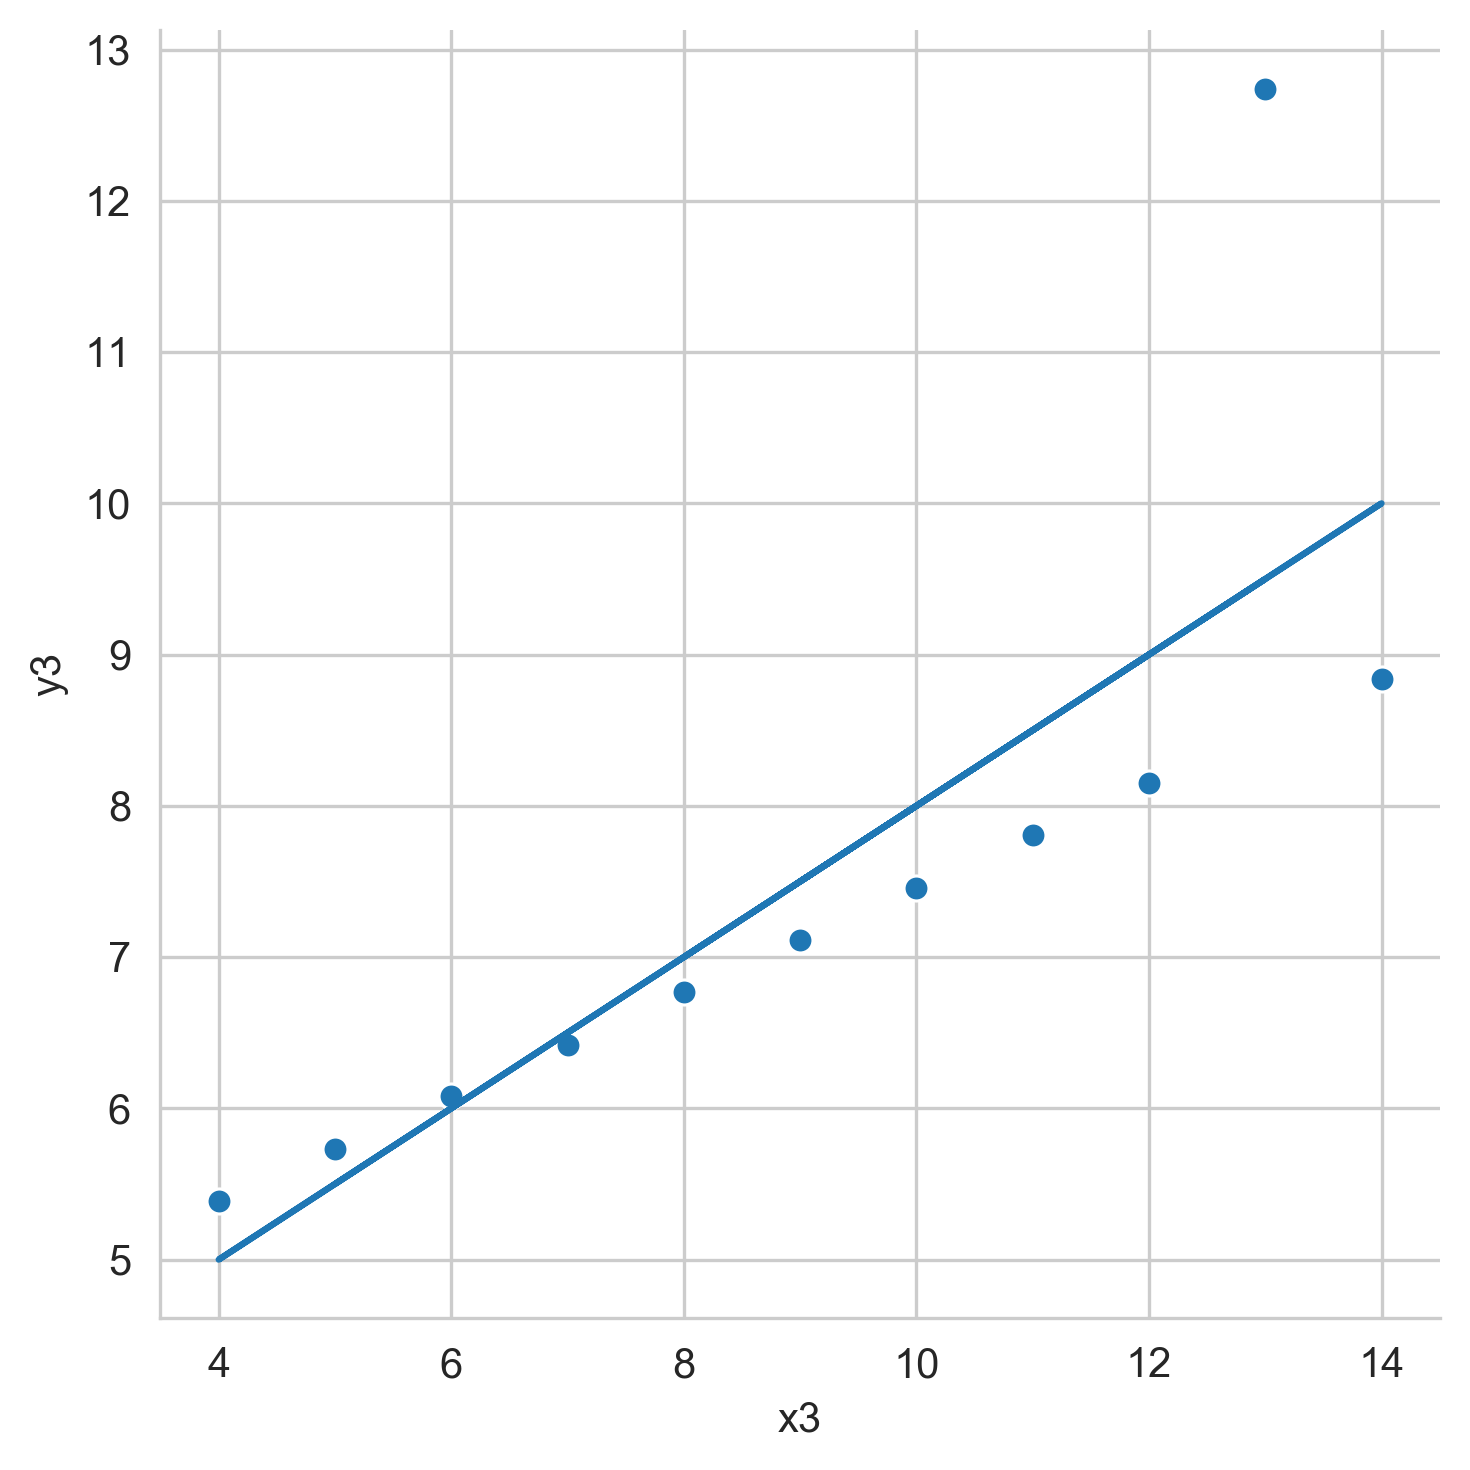

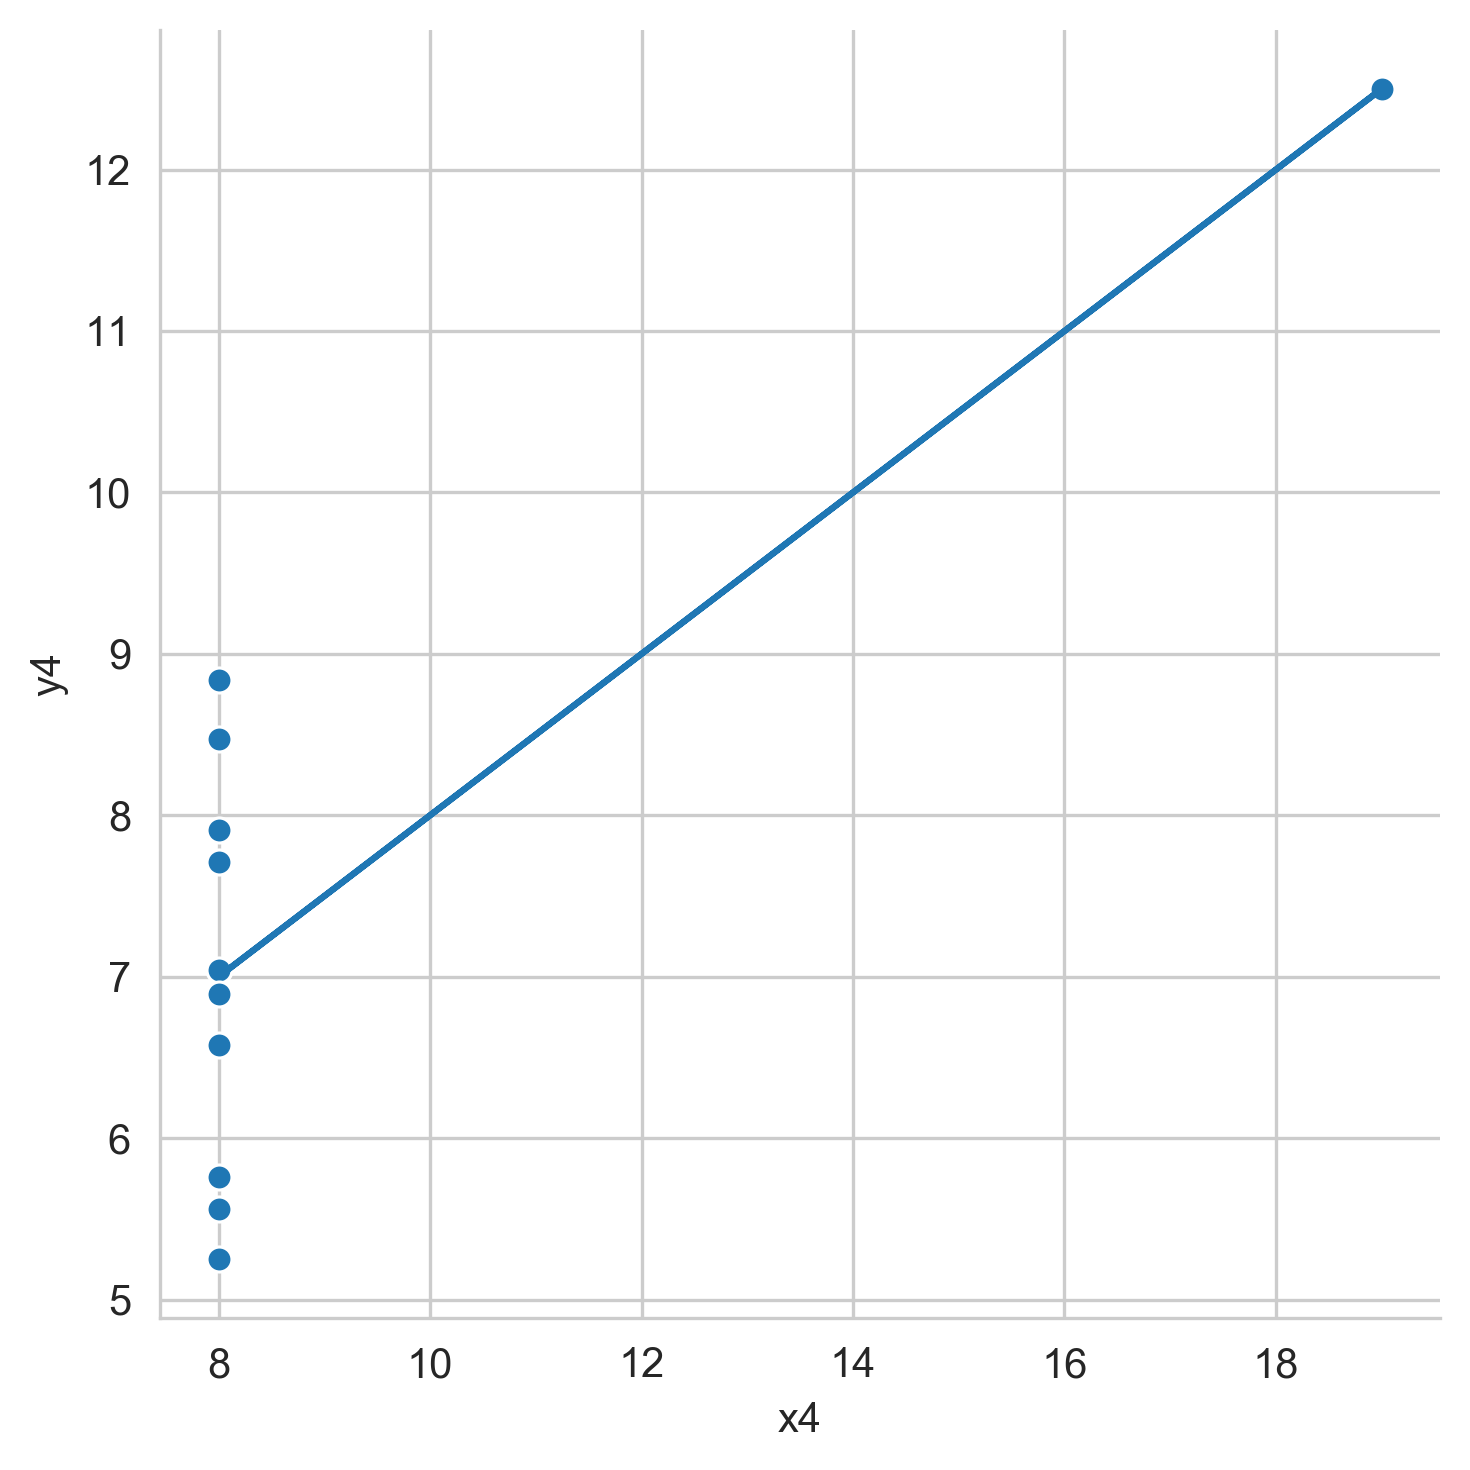

In [105]:
data_list = [data1, data2, data3, data4]

plt.figure(figsize=(4,4))
for i in range(0, 4):
    sns.relplot(x=data_list[i].columns[0], y=data_list[i].columns[-1], data=data_list[i])
    _x_data = data_list[i][data_list[i].columns[0]]
    plt.plot(_x_data, 0.5 * _x_data+3)

plt.tight_layout()

In [110]:
pd.concat([data1.describe(), data2.describe(), data3.describe(), data4.describe()], axis=1)

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [112]:
pd.concat([data1.corr(), data2.corr(), data3.corr(), data4.corr()], axis=0)

,x1,y1,x2,y2,x3,y3,x4,y4
x1,1.000000,0.816421,NaN,NaN,NaN,NaN,NaN,NaN
y1,0.816421,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
x2,NaN,NaN,1.000000,0.816237,NaN,NaN,NaN,NaN
y2,NaN,NaN,0.816237,1.000000,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.000000,0.816287,NaN,NaN
y3,NaN,NaN,NaN,NaN,0.816287,1.000000,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.816521
y4,NaN,NaN,NaN,NaN,NaN,NaN,0.816521,1.000000
